In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import json
import pandas as pd
import gzip
from pathlib import Path
from collections import Counter
import datetime
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS 

In [3]:
DATA_CLEAN_PATH = Path("../../data/clean")
df = pd.read_json(DATA_CLEAN_PATH / "arxiv_cs.json.gz")

In [4]:
df.head()

,id,authors,title,abstract,categories,primary_cat,date
0,0704.0002,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pe...",math.CO cs.CG,math.CO,2007-04-01
1,0704.0046,"I. Csiszar, F. Hiai and D. Petz",A limit relation for entropy and channel capac...,"In a quantum mechanical model, Diosi, Feldmann...",quant-ph cs.IT math.IT,quant-ph,2007-04-01
2,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,The intelligent acoustic emission locator is d...,cs.NE cs.AI,cs.NE,2007-04-01
3,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,Part I describes an intelligent acoustic emiss...,cs.NE cs.AI,cs.NE,2007-04-01
4,0704.0062,"Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Viterb...",cs.DS,cs.DS,2007-04-01


In [5]:
def generate_wordcloud(text, max_words=100, width=400, height=200, background_color="black", random_state=19): 
    wordcloud = WordCloud(font_path='./Verdana.ttf',
                          random_state=random_state,
                          background_color=background_color,
                          max_words=max_words,
                          width=800,
                          height=400,
                          stopwords = STOPWORDS # set or space-separated string
                          ).generate(text)# Verdana.ttf

    return wordcloud


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [7]:
text_df = df.title + " " + df.abstract
text_list = text_df.to_list()
len(text_list)

241276

In [8]:
# removing verbs
# cpu time: about 2000 records oer min. with 8 cores.

def extract_text(text_list, start=0, end=None)    :
    text = []
    if not end:
        end = len(text_list)
    total = end - start
    if total < 1 or start < 0 or end > len(text_list):
        raise Exception("Wrong start or end param.")
    print(f"total reocrds to analyze: {total}")

    for i, record in enumerate(text_list[start:end]):
        if i % 4000 == 0:
            print("record: ", i)
        doc = nlp(record)
        for token in doc:
            if token.text == "learning" or token.pos_ != 'VERB':
                text.append(token.text)
#             if token.pos_ != 'VERB' or token.tag_ == 'VBG': # gerund included
    text = ' '.join(text).lower()
    return text

In [9]:
# last 41276 papers
text = extract_text(text_list, start=200000)

total reocrds to analyze: 41276
record:  0
record:  4000
record:  8000
record:  12000
record:  16000
record:  20000
record:  24000
record:  28000
record:  32000
record:  36000
record:  40000


In [10]:
len(text)

39751306

In [7]:
with open("data/words2.txt", 'w') as f:
    f.write(text)
    
# with open("data/words2.txt", 'r') as f:
#     text = f.read()

In [8]:
wc = generate_wordcloud(text, max_words=50, random_state=17)

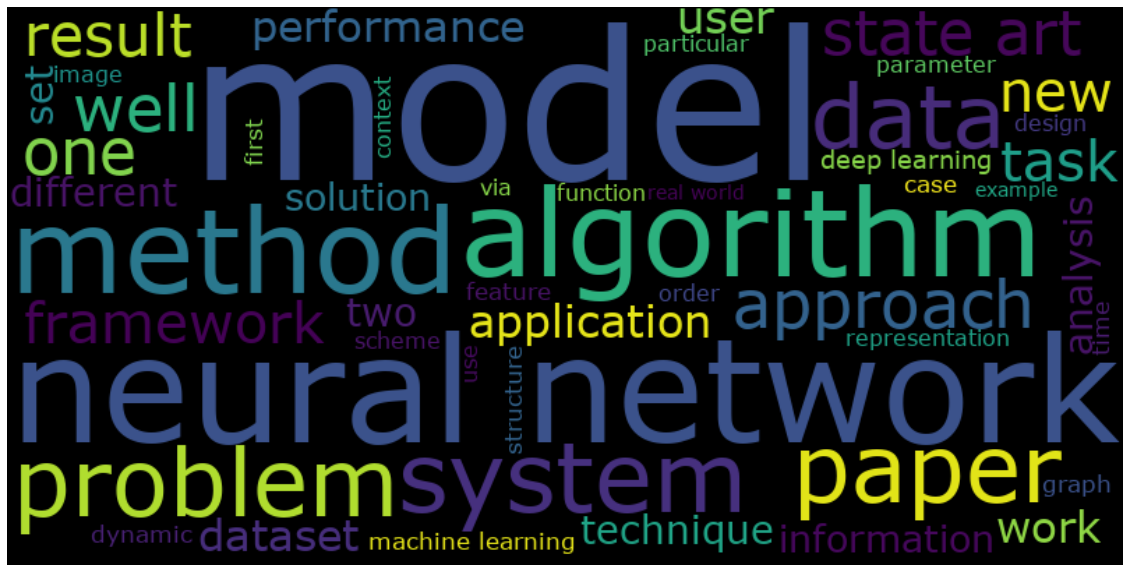

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation="bilinear")#, alpha=.95)
plt.axis("off")
plt.show()